In [37]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.power import TTestPower

### Problem 5

In [14]:
suger_conc = np.array([11.48,11.50, 11.45,11.42, 11.48,11.49, 11.47,11.45, 11.48,11.44,11.45,11.50, 11.47,11.49, 11.46,11.45, 11.47,11.46, 11.43,11.47])

#### (A) Test the hypothesis H0 = 11.5 vs. H1 does not = 11.5 using alpha = 0.05. Find the P-value

In [47]:
#Paramter of Interet: Mean
#Null Hypothesis: Stated in the problem 
#Alternate Hypothesis: Stated in the problem
#Test Statistic: Tnaught as variance is unknown 
n = len(suger_conc)
print('n is', n)
sample_mean= suger_conc.mean()
print('Sample Mean is', sample_mean)
sample_std = suger_conc.std()
print('Sample STD is,', sample_std)
test = (sample_mean - 11.5) / (sample_std/(n**(1/2)))
test #This is functionally a Z value - it will tell you your probability 


n is 20
Sample Mean is 11.465500000000002
Sample STD is, 0.021558061137310333


-7.156890847686181

In [27]:
df = 19  # Example degrees of freedom

# Compute the cumulative probability for the given t-value (one-tailed)
p_value = stats.t.cdf(test, df)

p_value_two_tailed = 2 * p_value

print(f"p-value for t-value {test} with {df} degrees of freedom: {p_value_two_tailed}")


p-value for t-value -7.156890847686181 with 19 degrees of freedom: 8.40795940660253e-07


#### Our P-value is very, very small, assuredly smaller than the alpha value. That means that we can reject the null, the true mean is not 11.5. 

#### (B) Compute the power of the test if the true mean is 11.4

In [38]:
true_mean = 11.4
null_mean = 11.5
std = sample_std
n = n
df = n - 1
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, df)  
t_critical
margin_of_error = t_critical * (std / np.sqrt(n))

# Compute critical region boundaries
lower_critical = null_mean - margin_of_error
upper_critical = null_mean + margin_of_error

# Calculate t-scores for true mean relative to critical boundaries
t_lower = (lower_critical - true_mean) / (std / np.sqrt(n))
t_upper = (upper_critical - true_mean) / (std / np.sqrt(n))

# Power is the probability of rejecting the null under the true mean
power = stats.t.cdf(t_lower, df) + (1 - stats.t.cdf(t_upper, df))


print(f"Power of the t-test: {power:.4f}")


Power of the t-test: 1.0000


In [39]:
effect_size = (true_mean - null_mean) / std

# Create a TTestPower instance
power_analysis = TTestPower()

# Calculate power
power = power_analysis.power(effect_size=effect_size, nobs=n, alpha=alpha, alternative='two-sided')

print(f"Power of the test: {power:.4f}")

Power of the test: 1.0000


#### (C) What Sample Size would be required to detect a true mean sugar concentraion of 11.45 if we wanted the power of the test to be at least 0.9? 

In [45]:
true_mean = 11.45
effect_size = (true_mean - null_mean) / std
sample_size = power_analysis.solve_power(effect_size=effect_size, power=0.9, alpha=0.05)
print('sample size is:', sample_size)

sample size is: 4.270165417242369


#### (D) Explain how the question in part (a) could be answered by constructing a two-sided confidence interval on the mean sugar concentration

#### A two sided confidence interval calculates the range of possible values for a given parameter. Using an alpha of 0.05, we could calculate a 95% confidence interval and then see if the null value for the mean falls within that range. If it doesn't, we can reject it. If it does, we can accept it

#### (E) Is ther evidence to support the assumption that the sugar concentraiton is normall distributed?

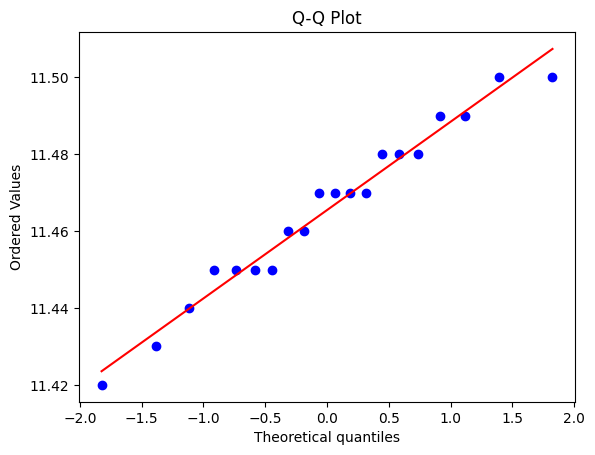

In [46]:
stats.probplot(suger_conc, dist="norm", plot=plt)

# Show the plot
plt.title("Q-Q Plot")
plt.show()

#### Yes, this appears to be normally distributed